In [44]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [2]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Extracting Apple Stock Data Using from Yahoo Finance

In [189]:
tesla = yf.Ticker("AAPL")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,0.0,0.0


# Apple Stock Price Trend 10yr

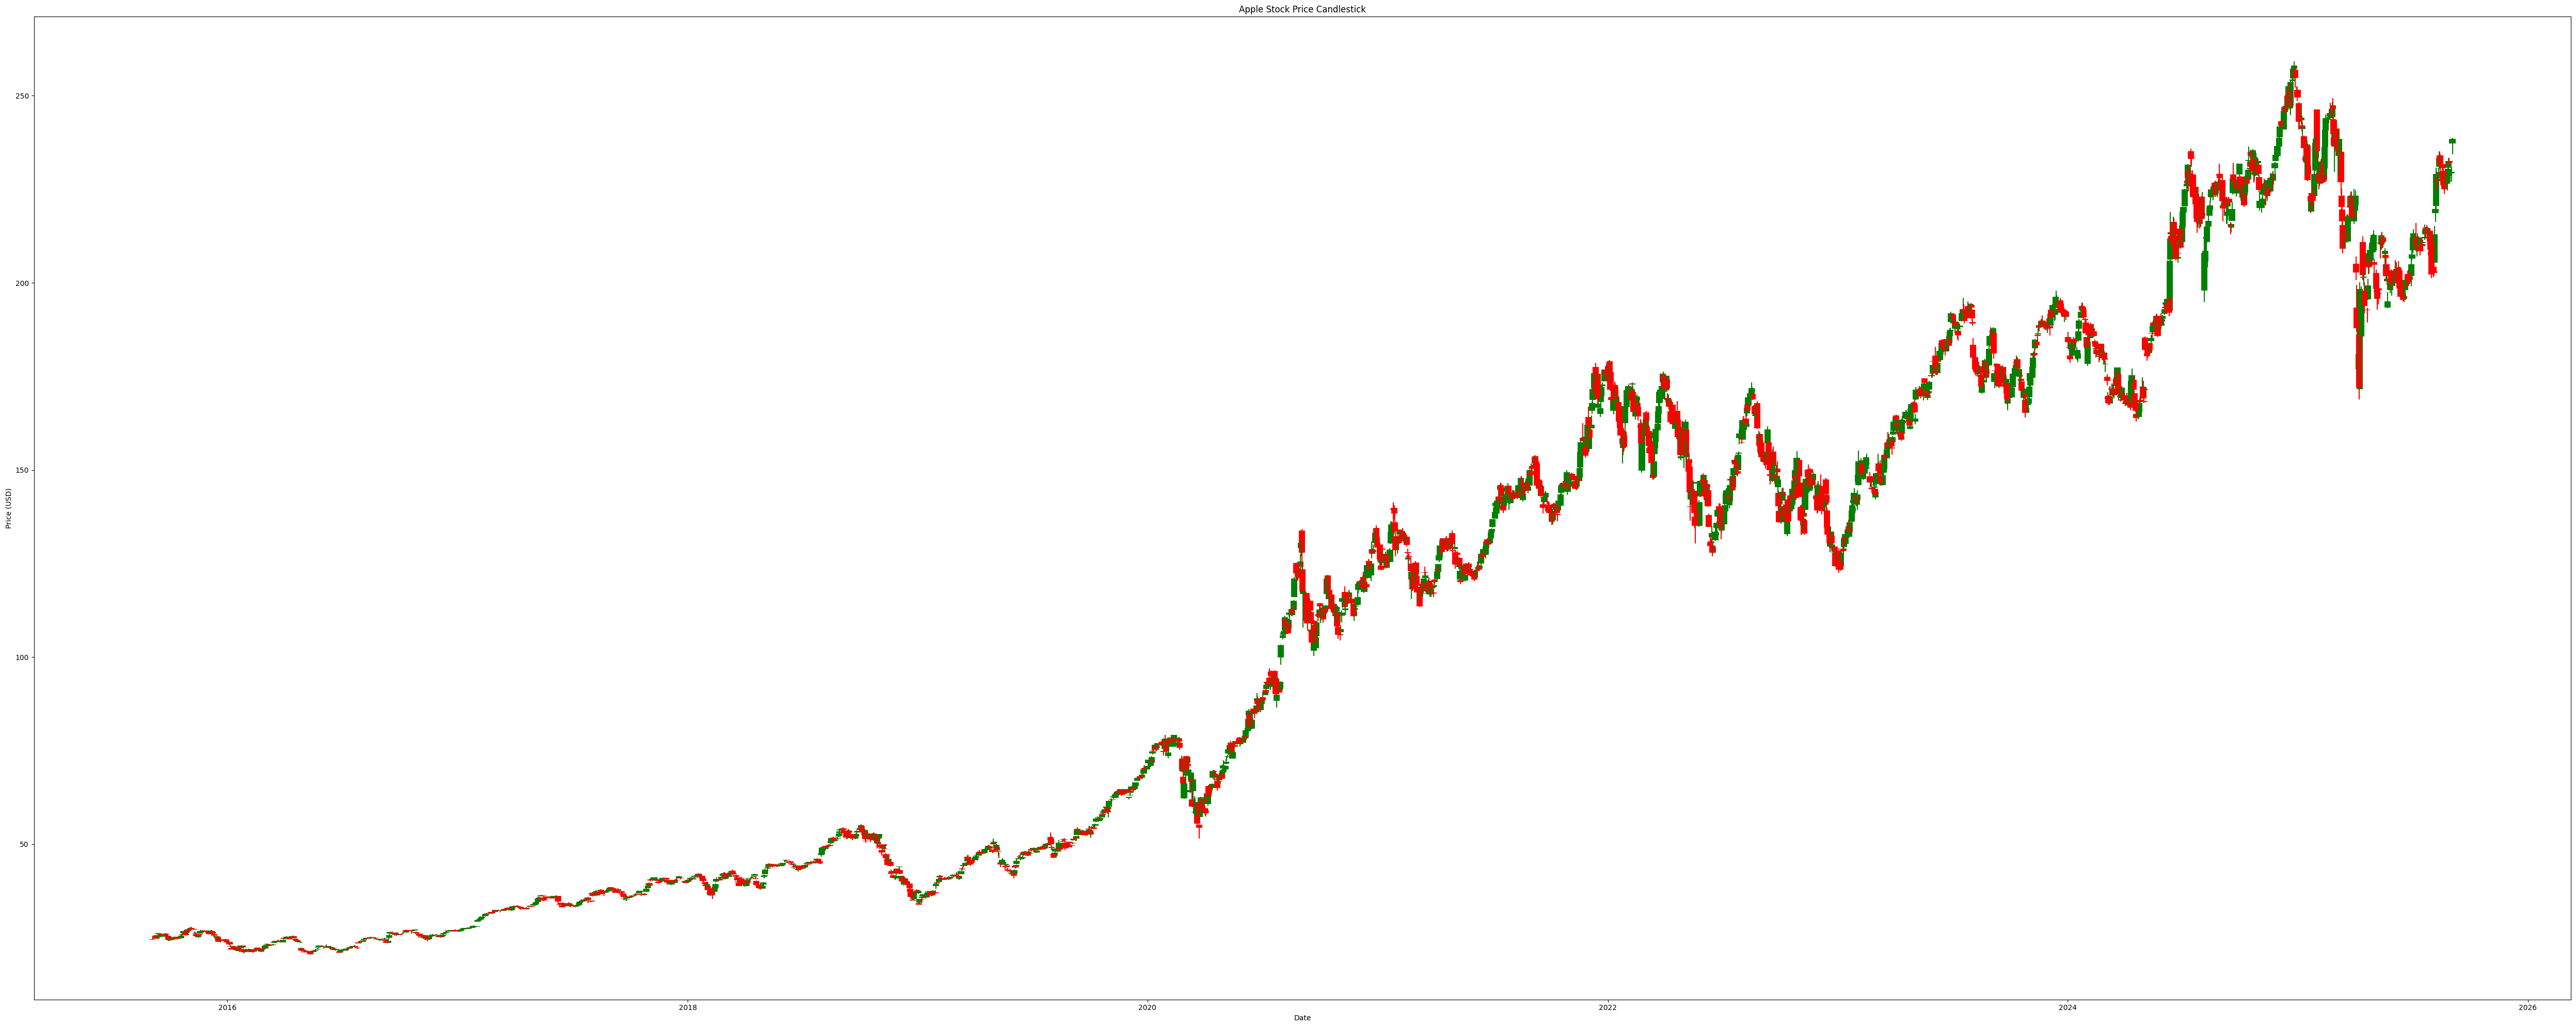

In [206]:
# Tesla Stock Prices and Revenue Graph from past 10  years
aapl = yf.Ticker("AAPL")
data = tsla.history(period="10y")

# Prepare OHLC data
ohlc = data[['Open', 'High', 'Low', 'Close']].copy()
ohlc.reset_index(inplace=True)

# Plot candlestick chart
fig, ax = plt.subplots(figsize=(50, 20))

# Define colors
up = ohlc['Close'] >= ohlc['Open']
down = ohlc['Close'] < ohlc['Open']

# Plot up days
ax.bar(ohlc['Date'][up], ohlc['Close'][up] - ohlc['Open'][up], bottom=ohlc['Open'][up], color='green', width=10)
ax.vlines(ohlc['Date'][up], ohlc['Low'][up], ohlc['High'][up], color='green')

# Plot down days
ax.bar(ohlc['Date'][down], ohlc['Close'][down] - ohlc['Open'][down], bottom=ohlc['Open'][down], color='red', width=10)
ax.vlines(ohlc['Date'][down], ohlc['Low'][down], ohlc['High'][down], color='red')

# Labels and title
ax.set_title('Apple Stock Price Candlestick')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
plt.tight_layout()
plt.show()


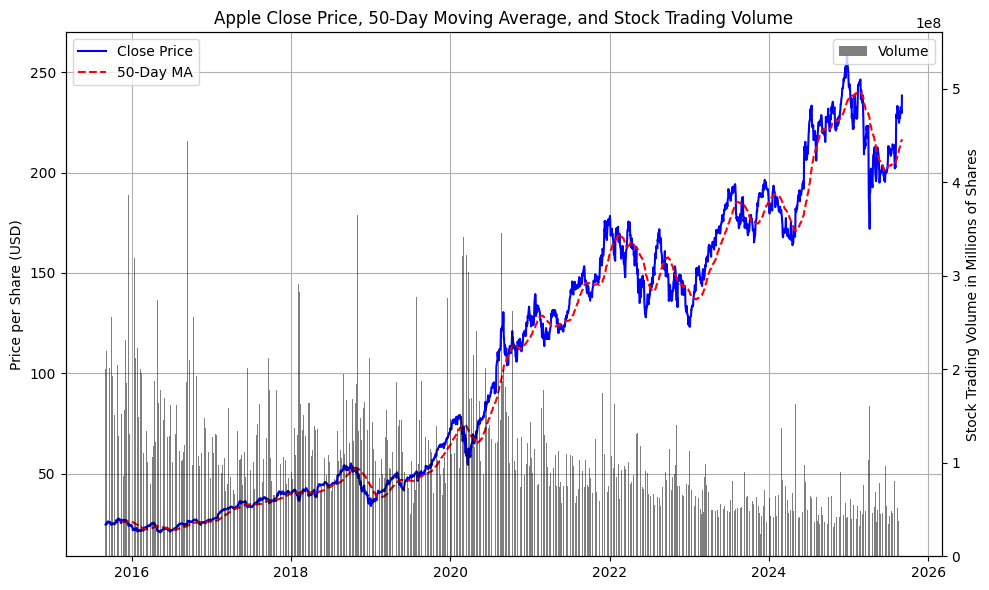

In [197]:
# Fetch Apple Stock data
aapl = yf.Ticker("AAPL")
data = aapl.history(period="10y")
data = data.reset_index()

# Calculate 30-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()


# Plot closing price and 30-day moving average
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(data['Date'], data['Close'], label='Close Price', color='blue')
ax1.plot(data['Date'], data['MA50'], label='50-Day MA', linestyle='--', color='red')
ax1.set_ylabel('Price per Share (USD)')
ax1.set_title('Apple Close Price, 50-Day Moving Average, and Stock Trading Volume')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.bar(data['Date'], data['Volume'], label='Volume', color='black', alpha=0.5)
ax2.set_ylabel('Stock Trading Volume in Millions of Shares')
ax2.legend(loc= 'upper right')

# Save or show the plot
plt.tight_layout()
plt.show()

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [198]:
# 50-day Moving Average
data['MA50'] = data['Close'].rolling(window=50).mean()

# Create target variable: Buy (1) if Close > MA50, else Sell (0)
data['Signal'] = (data['Close'] > data['MA50']).astype(int)

# RSI (Relative Strength Index)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD (Moving Average Convergence Divergence)
ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()
data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

# Drop rows with NaN values due to moving averages
data.dropna(inplace=True)

# Features and target
features =['MA50', 'RSI', 'MACD', 'Signal_Line', 'Bollinger_Upper', 'Bollinger_Lower', 'Volume']
X = data[features]
y = data['Signal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print("Apple Buy and Sell Algorithm:\n")
print(report)

print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Apple Buy and Sell Algorithm:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        79

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.97       124
weighted avg       0.98      0.98      0.98       124

Train Accuracy: 0.9965811965811966
Test Accuracy: 0.9758064516129032


#### The algorithm is highly overtrained. 
##### The following can effect the performance of a model: Data volatility.
###### Stock prices represent past information without accounting for all fundamental data found in quarterly/annual company reports. To combate against the data complexcity, cross-validation, data spliting, standarized models will be used. 

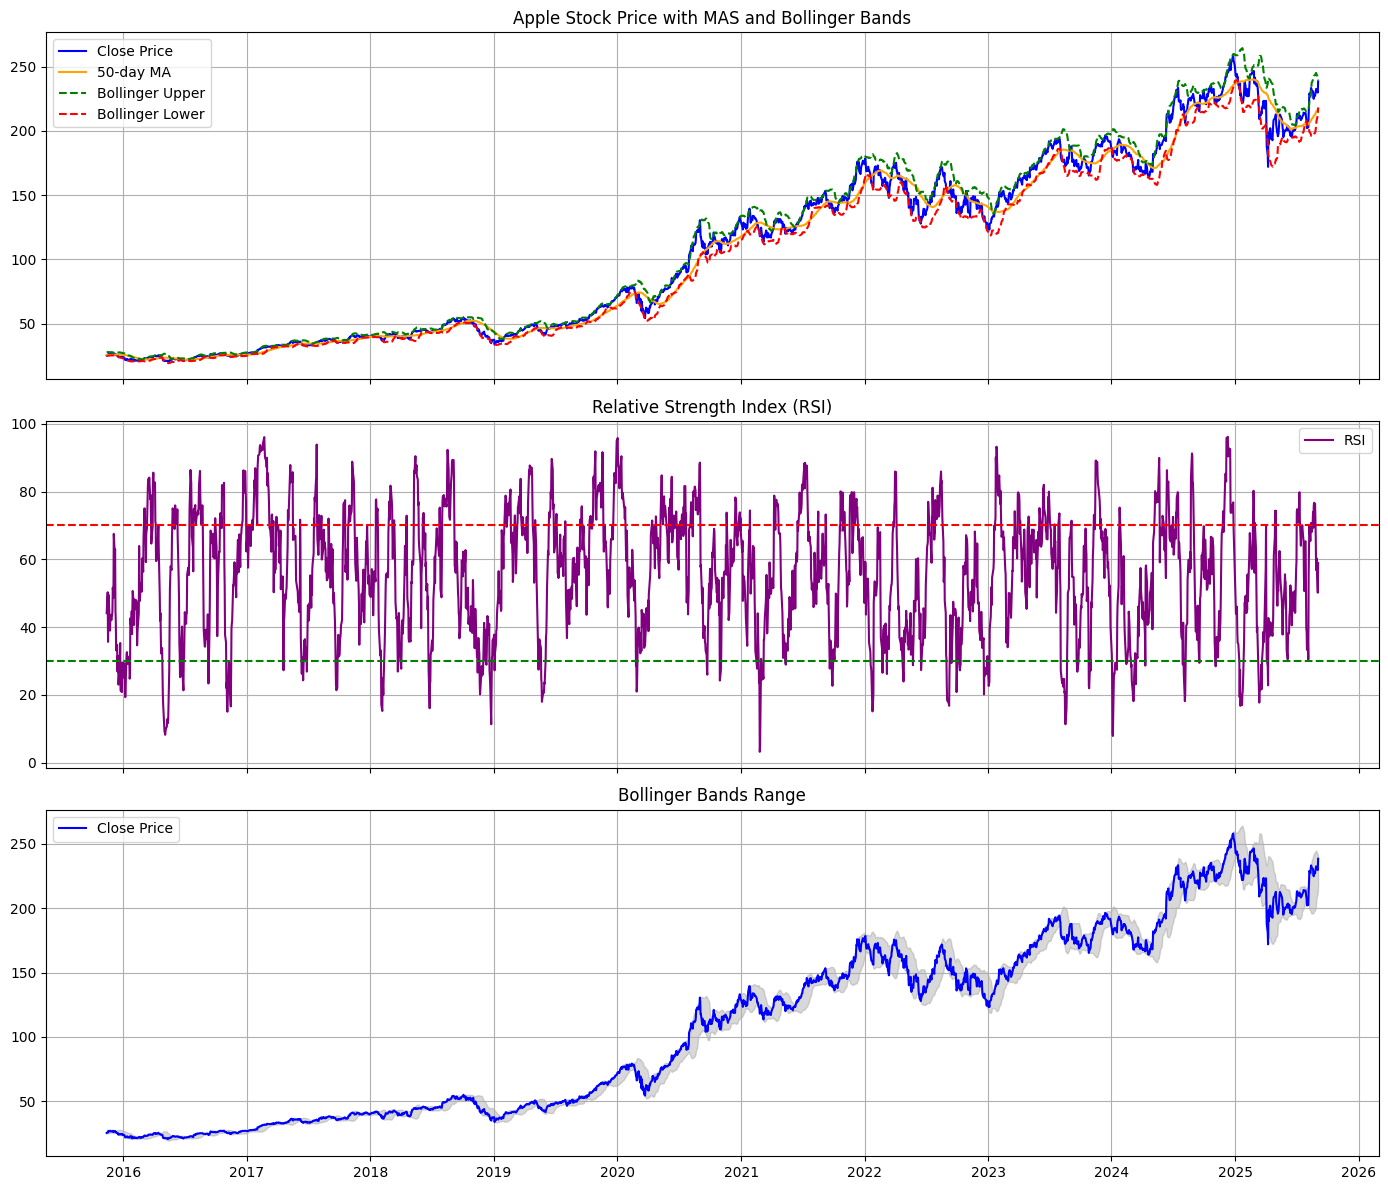

In [208]:
# Calculate 50-day Moving Average (MAS)
data['MAS'] = data['Close'].rolling(window=50).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()
data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

# Dropping rows that are null
data.dropna(inplace=True)

# Creating the plots for the graphs
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Close Price, MAS, Bollinger Bands
axs[0].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[0].plot(data.index, data['MAS'], label='50-day MA', color='orange')
axs[0].plot(data.index, data['Bollinger_Upper'], label='Bollinger Upper', linestyle='--', color='green')
axs[0].plot(data.index, data['Bollinger_Lower'], label='Bollinger Lower', linestyle='--', color='red')
axs[0].set_title('Apple Stock Price with MAS and Bollinger Bands')
axs[0].legend()
axs[0].grid(True)

# RSI
axs[1].plot(data.index, data['RSI'], label='RSI', color='purple')
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(30, color='green', linestyle='--')
axs[1].set_title('Relative Strength Index (RSI)')
axs[1].legend()
axs[1].grid(True)

# Bollinger Bands Range
axs[2].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[2].fill_between(data.index, data['Bollinger_Lower'], data['Bollinger_Upper'], color='gray', alpha=0.3)
axs[2].set_title('Bollinger Bands Range')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### The model appears to be overtraining using Tesla's Stock data. To confirm, I will be using another public company's stock info, Google, Apple, Invidia, Microsoft, Amazon, and Gamestop. 

In [200]:
tickers = ["GOOG", "TLSA", "NVDA", "MSFT", "AMZN","GME"]

for ticker in tickers:
    try:
        # Fetch historical data for each ticker
        data = yf.Ticker(ticker).history(period="10y")
        print({ticker})
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

{'GOOG'}
{'TLSA'}
{'NVDA'}
{'MSFT'}
{'AMZN'}
{'GME'}


In [201]:
for symbol in tickers:
    try:
        df = yf.Ticker(symbol).history(period="5y")

        # Feature Engineering
        df['MA50'] = df['Close'].rolling(window=50).mean()
        df['Signal'] = (df['Close'] > df['MA50']).astype(int)

        delta = df['Close'].diff()
        gain = delta.where(delta > 0, 0).rolling(window=14).mean()
        loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

    
        rolling_mean = df['Close'].rolling(window=20).mean()
        rolling_std = df['Close'].rolling(window=20).std()
        df['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
        df['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

        df.dropna(inplace=True)

        # Model Training
        features = ['MA50', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower', 'Volume']
        X = df[features]
        y = df['Signal']

        #Scaling features for 
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

        model = RandomForestClassifier(n_estimators=100, max_depth=1, max_features=0.3, min_samples_split=2, min_samples_leaf=1,class_weight='balanced_subsample', random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred)
        
        print(f"{symbol}: Random Forest Classification Report")
        print(report)
        
        print("Train Accuracy:", model.score(X_train, y_train))
        print("Test Accuracy:", model.score(X_test, y_test))


    except Exception as e:
        print(f"Error processing {symbol}: {e}")

GOOG: Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       122
           1       0.89      0.84      0.86       240

    accuracy                           0.82       362
   macro avg       0.80      0.81      0.81       362
weighted avg       0.83      0.82      0.83       362

Train Accuracy: 0.8291814946619217
Test Accuracy: 0.8232044198895028
TLSA: Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       231
           1       0.64      0.76      0.69       131

    accuracy                           0.76       362
   macro avg       0.74      0.76      0.75       362
weighted avg       0.77      0.76      0.76       362

Train Accuracy: 0.7995255041518387
Test Accuracy: 0.7596685082872928
NVDA: Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.69    

In [ ]:
#### This Random Forest Machine Learning Model has a low overfitting of around 2% on average. 
#### Percision, recall and the f1 score all float around 80% boasting a balanced performanced.
#### TSLA is the outling weakest performer due to the high volitily in it's stock price. 
##### TSLA stock has in